In [1]:
## git clone https://github.com/CSSEGISandData/COVID-19.git


In [2]:
path = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

In [3]:
d1 = "time_series_covid19_confirmed_global.csv"
d2 = "time_series_covid19_deaths_global.csv"
d3 = "time_series_covid19_recovered_global.csv"




In [4]:
import pandas as pd

In [5]:
dd1 = pd.read_csv(path+d1)
dd2 = pd.read_csv(path+d2)
dd3 = pd.read_csv(path+d3)


In [6]:
import json

with open("population_202004010609.json","r") as f:
    dd = json.loads(f.read())


In [7]:
dd['Korea, South'] = dd['South Korea']
dd['US'] = dd['United States']
dd['Czechia'] = dd['Czech Republic (Czechia)']
dd['Taiwan*'] = dd['Taiwan']
dd['Brunei'] = dd['Brunei ']

dd["Cote d'Ivoire"] = dd["Côte d'Ivoire"]


In [8]:
dd1.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/29/20             int64
3/30/20             int64
3/31/20             int64
4/1/20              int64
4/2/20              int64
Length: 76, dtype: object

In [29]:
country = []
for i in dd1['Country/Region'].drop_duplicates():
    country.append(i)
    
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%y')


In [30]:
def convertData(dd1,country,dd):
    df_0 = dd1.loc[lambda df: df['Country/Region'] == country[0]]
    df_0.loc['value', :] = df_0.sum()
    data = df_0.T[4:]
    data[country[0]] = data['value'] #/int(dd[country[0]])
    data['date'] = [ dateparse(i) for i in data.index ]
    
    error2 = []
    country2 = []
    country2.append(country[0])

    for i in country[1:]:    
        df_1 = dd1.loc[lambda df: df['Country/Region'] == i]
        df_1.loc['value', :] = df_1.sum()

        data_11 = df_1.T[4:]
        #data_11 = data_11.loc[lambda df: df['value'] >100]
        try:
            data_11[i] = data_11['value'] #/int(dd[i])
        except:
            print("--",i,"--")
            error2.append(i)
            continue

        data_1 = data_11
        data_1['date'] = [ dateparse(j) for j in data_1.index ]
        data = data.merge(data_1, how='outer', on='date')
        country2.append(i)
    return data, country2

In [31]:
data, country2 = convertData(dd1,country,dd)
dataDeath, country2 = convertData(dd2,country,dd)
dataRecovered, country2 = convertData(dd3,country,dd)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
country2

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [55]:
#data
df = data[country2[:]+['date']]
df2 = dataDeath[country2[:]+['date']]
df3 = dataRecovered[country2[:]+['date']]



In [111]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam,Botswana,Burundi,Sierra Leone,Malawi,date
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-01-22
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-01-23
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-01-24
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-01-25
4,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,2020-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,120,212,511,334,7,7,745,424,3984,8788,...,18,2,94,10,2,0,0,0,0,2020-03-29
68,170,223,584,370,7,7,820,482,4361,9618,...,25,7,94,14,2,3,0,0,0,2020-03-30
69,174,243,716,376,7,7,1054,532,4559,10180,...,28,8,112,15,2,4,2,1,0,2020-03-31
70,237,259,847,390,8,7,1054,571,4862,10711,...,31,8,125,15,9,4,2,2,0,2020-04-01


In [56]:
import copy
df4 = copy.deepcopy( df )

In [49]:

for i in df.columns[:-1]:
    #print(i)
    df4[i] = [ df4[i][j]-df4[i][j-1] if j>0 else 0 for j in df.index ]

### df4 ##: new confirmed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [206]:
import copy
df5 = copy.deepcopy( df )

In [207]:
for i in df.columns[:-1]:
    #print(i)
    df5[i] = [ df[i][j]-df2[i][j]-df3[i][j] for j in df.index ]


In [208]:
dfNew = copy.deepcopy( df5 )


In [209]:
df_0 = dfNew[country[0]].reset_index()
df_0 = df_0.loc[lambda df: df[country[0]] >100]


In [210]:
data_0 = df_0[ [country[0]] ]

In [211]:
#data['date'] = [ dateparse(i) for i in data.index ]
data_0['day'] = [ i for i,ii in enumerate(data_0.index) ]
#data_0 = data_0.reset_index()
#data_0[country[0]] = [ data_0[country[0]][j]  for j in data_0.index]

In [212]:
country2 = []
for i in country[1:]:   
    df_1 = dfNew[i].reset_index()
    if 'Japan' in i:
        data_1 = df_1.loc[lambda df: df[i] >100]
    else:
        data_1 = df_1.loc[lambda df: df[i] >5000]

    data_1['day'] = [ j for j,ii in enumerate(data_1.index) ]
    #data_1 = data_1.reset_index()
    #data_1[i] = [ data_1['value'][j]-data_1['value'][j-1] if j>0 else 0 for j in data_1.index ]
    #data1['date'] = [ dateparse(j) for j in data1.index ]
    if len(data_1['day'])>0:    
        data_0 = data_0.merge(data_1, how='outer', on='day')
        country2.append(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [213]:
df6 = data_0[ country2+['day']]

Text(0, 0.5, '# of current patients')

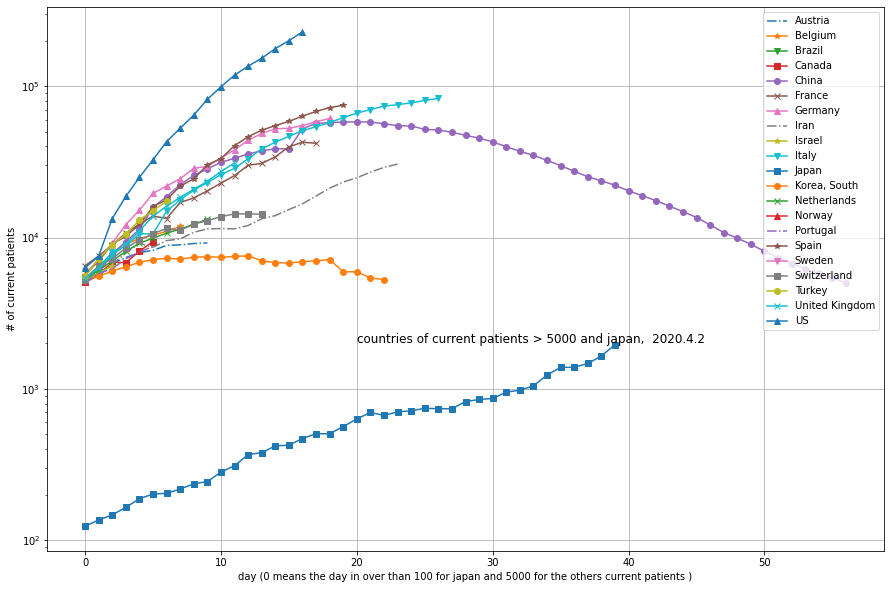

In [224]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams["figure.facecolor"] = "w"


fig, ax = plt.subplots(figsize=(15, 10))
maker = ["-.",'-*','-v','-s','-o','-x',"-^"]

for i,ii in enumerate(country2[:]):
    df6.plot(ax=ax, x="day",y=ii, style=maker[i%7])

#ax.get_legend().remove()
ax.grid(True)
ax.set_yscale('log')
plt.text(20, 2*10**3, "{} {}".format("countries of current patients > 5000 and japan, ", "2020.4.2"), fontsize=12)
#ax.set_xlabel('day (0 means the day in over than 5000 current patients )')
ax.set_xlabel('day (0 means the day in over than 100 for japan and 5000 for the others current patients )')

ax.set_ylabel('# of current patients')


In [215]:
import json

with open("population_202004010609.json","r") as f:
    dd = json.loads(f.read())
dd['Korea, South'] = dd['South Korea']
dd['US'] = dd['United States']
dd['Czechia'] = dd['Czech Republic (Czechia)']
dd['Taiwan*'] = dd['Taiwan']
dd['Brunei'] = dd['Brunei ']

dd["Cote d'Ivoire"] = dd["Côte d'Ivoire"]


Text(0, 0.5, '# of current patients / population')

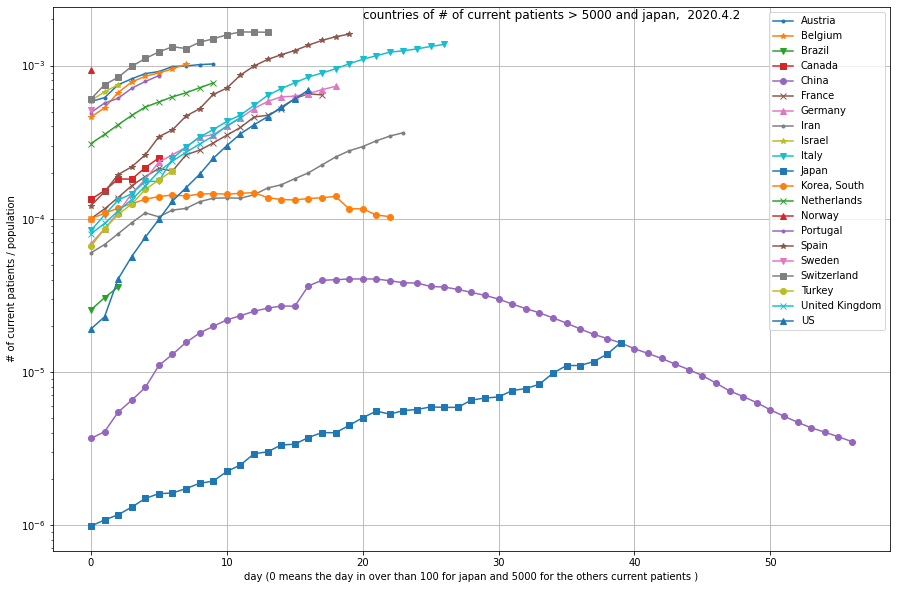

In [222]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams["figure.facecolor"] = "w"


fig, ax = plt.subplots(figsize=(15, 10))
maker = [".",'*','v','s','o','x',"^"]

import numpy as np 

for i,ii in enumerate(country2[:]):
    try:
        yy = np.array(df6[ii].dropna())/float(dd[ii])
        ax.plot(df6['day'][:len(yy)],yy, marker=maker[i%7], label=ii)
    except:
        continue

#ax.get_legend().remove()
ax.grid(True)
ax.legend()
ax.set_yscale('log')
plt.text(20, 2*10**-3, "{} {}".format("countries of # of current patients > 5000 and japan, ", "2020.4.2"), fontsize=12)
ax.set_xlabel('day (0 means the day in over than 100 for japan and 5000 for the others current patients )')
ax.set_ylabel('# of current patients / population')


Text(0, 0.5, '# of current patients / population')

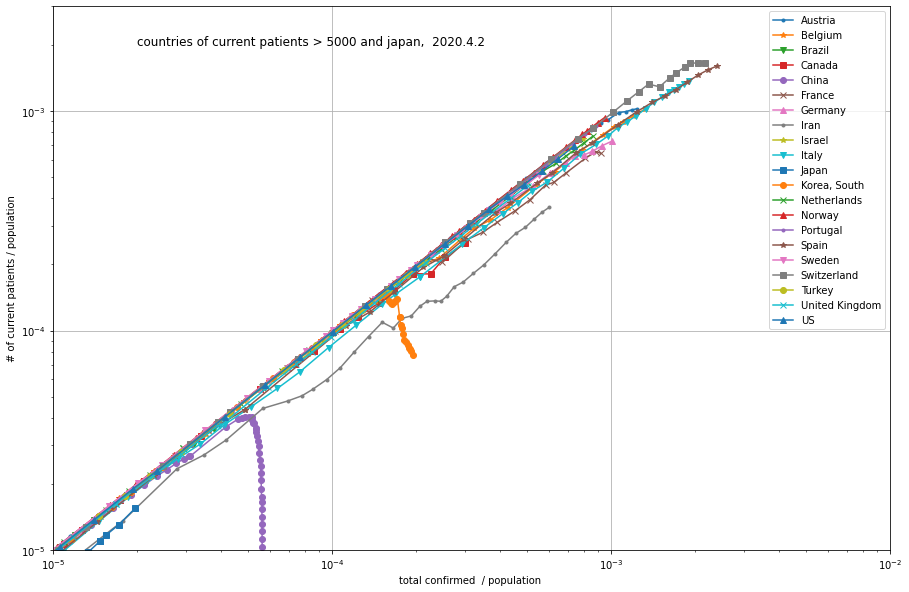

In [219]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams["figure.facecolor"] = "w"


fig, ax = plt.subplots(figsize=(15, 10))
maker = [".",'*','v','s','o','x',"^"]

import numpy as np 

for i,ii in enumerate(country2[:]):
    #try:
        xx = np.array(df[ii].dropna())/float(dd[ii])
        yy = np.array(df5[ii].dropna())/float(dd[ii])
        ax.plot(xx,yy, marker=maker[i%7], label=ii)
    #except:
    #    continue

#ax.get_legend().remove()
ax.grid(True)
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(10**-5, 10**-2)
plt.ylim(10**-5, 3*10**-3)

plt.text(2*10**-5, 2*10**-3, "{} {}".format("countries of current patients > 5000 and japan, ", "2020.4.2"), fontsize=12)
ax.set_xlabel('total confirmed  / population ')
ax.set_ylabel('# of current patients / population')


Text(0, 0.5, '# of current patients / population')

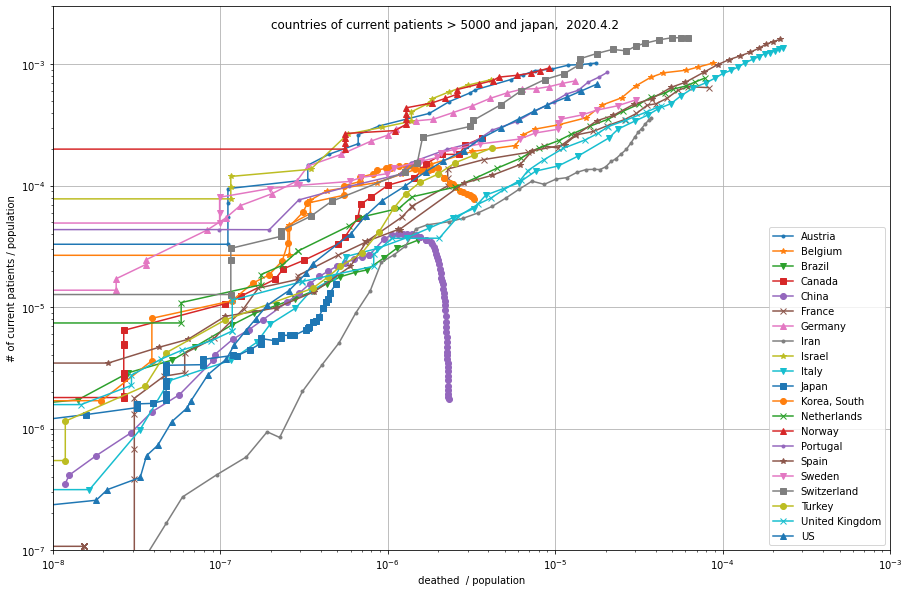

In [218]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams["figure.facecolor"] = "w"


fig, ax = plt.subplots(figsize=(15, 10))
maker = [".",'*','v','s','o','x',"^"]

import numpy as np 

for i,ii in enumerate(country2[:]):
    #try:
        xx = np.array(df2[ii].dropna())/float(dd[ii])
        yy = np.array(df5[ii].dropna())/float(dd[ii])
        ax.plot(xx,yy, marker=maker[i%7], label=ii)
    #except:
    #    continue

#ax.get_legend().remove()
ax.grid(True)
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(10**-8, 10**-3)
plt.ylim(10**-7, 3*10**-3)

plt.text(2*10**-7, 2*10**-3, "{} {}".format("countries of current patients > 5000 and japan, ", "2020.4.2"), fontsize=12)
ax.set_xlabel(' deathed  / population ')
ax.set_ylabel('# of current patients / population')
